# Backtest Analysis - ReWTSE-LLM-RL Trading System

Comprehensive analysis of multi-ticker backtest results with extended metrics.

**Backtest Period:** March 2012 - December 2020 (~8.75 years)  
**Initial Capital:** $10,000 per ticker  
**Tickers Analyzed:** GOOGL, MSFT, AMZN, META, TSLA

In [21]:
!pip install scipy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

# Load data
df = pd.read_csv('backtest_report.csv')
df

,Ticker,Initial_Balance,Final_Value,Total_Return_%,Sharpe_Ratio,Max_Drawdown_%,Volatility_%,Win_Rate_%,Avg_Return_Per_Trade_%,Num_Chunks,...,PE_Ratio_Avg,Debt_to_Equity_Avg,Current_Ratio_Avg,ROE_Avg_%,Gross_Margin_Avg_%,Operating_Margin_Avg_%,SPX_Avg,Price_Start,Price_End,Stock_Price_Change_%
0,GOOGL,10000,13012.818540,30.128185,0.315336,17.917712,11.690054,8.947131,0.014628,5,...,27.033085,11.481,1.904,34.829000,58.943003,32.429,2291.738094,15.309574,86.217850,463.162953
1,MSFT,10000,84850.928620,748.509286,1.091106,27.775686,25.250030,51.920470,0.109327,5,...,37.597366,32.661,1.353,33.280998,68.824000,44.901,2291.738094,25.881758,213.108902,723.394238
2,AMZN,10000,37243.958970,272.439590,0.844163,26.988816,20.103900,18.029824,0.067345,5,...,32.475610,47.808,1.024,24.770000,49.607000,11.432,2291.738094,9.113000,164.292496,1702.836577
3,META,10000,68593.251000,585.932510,0.973795,38.950377,28.334289,36.543909,0.109491,5,...,26.041225,25.406,1.973,40.647998,81.966000,43.019,2333.549070,23.008160,270.204285,1074.384605
4,TSLA,10000,240126.483365,2301.264834,1.019295,59.563461,45.652378,35.878897,0.184656,5,...,263.059880,16.823,2.037,8.177000,17.480000,4.103,2291.738094,2.352667,231.593338,9743.863532


## 1. Metrics Definitions

**Performance Metrics:**
- **Total Return**: Overall % gain/loss from initial balance
- **Sharpe Ratio**: Risk-adjusted return (>1 good, >2 excellent)
- **Max Drawdown**: Largest peak-to-trough decline (%)
- **Volatility**: Annualized standard deviation of returns
- **Win Rate**: % of profitable trades

**Technical Metrics:**
- **RSI**: Relative Strength Index (>70 overbought, <30 oversold)
- **MACD**: Moving Average Convergence Divergence (momentum)
- **ATR**: Average True Range (volatility measure)
- **Beta**: Stock correlation with market (>1 more volatile, <1 less)
- **Historical Volatility**: Past price variation

**Fundamental Metrics:**
- **P/E Ratio**: Price-to-Earnings (valuation metric)
- **Debt-to-Equity**: Leverage ratio (<1 low debt, >2 high risk)
- **Current Ratio**: Liquidity (>2 excellent, <1 risky)
- **ROE**: Return on Equity (>15% excellent)
- **Gross/Operating Margin**: Profitability metrics

**Macro Metrics:**
- **SPX Average**: S&P 500 index level during backtest

## 2. Statistical Summary

In [22]:
# Performance metrics summary
perf_cols = ['Total_Return_%', 'Sharpe_Ratio', 'Max_Drawdown_%', 'Volatility_%', 'Win_Rate_%']
summary = df[perf_cols].describe().round(2)
print(summary)

print("\n" + "="*70)
print("INTERPRETATION:")
print("="*70)
print(f"Return Range: {summary.loc['min', 'Total_Return_%']:.1f}% to {summary.loc['max', 'Total_Return_%']:.1f}%")
print(f"  → Worst performer returned {summary.loc['min', 'Total_Return_%']:.1f}%")
print(f"  → Best performer returned {summary.loc['max', 'Total_Return_%']:.1f}%")
print(f"  → Average return: {summary.loc['mean', 'Total_Return_%']:.1f}% over ~9 years")

print(f"\nSharpe Ratio: {summary.loc['mean', 'Sharpe_Ratio']:.2f} (average)")
print(f"  → Values >1 are good, >2 excellent (risk-adjusted)")
print(f"  → {(df['Sharpe_Ratio'] > 1).sum()}/{len(df)} tickers exceeded 1.0")

print(f"\nMax Drawdown: {summary.loc['mean', 'Max_Drawdown_%']:.1f}% (average)")
print(f"  → Largest loss from peak: {summary.loc['max', 'Max_Drawdown_%']:.1f}%")
print(f"  → This is how much you could lose in worst period")

print(f"\nWin Rate: {summary.loc['mean', 'Win_Rate_%']:.1f}% (average)")
print(f"  → Only {summary.loc['mean', 'Win_Rate_%']:.1f}% of trades were profitable")
print(f"  → Low win rate but still profitable = big wins compensate losses")

summary

       Total_Return_%  Sharpe_Ratio  Max_Drawdown_%  Volatility_%  Win_Rate_%
count            5.00          5.00            5.00          5.00        5.00
mean           787.65          0.85           34.24         26.21       30.26
std            890.58          0.31           16.00         12.57       16.91
min             30.13          0.32           17.92         11.69        8.95
25%            272.44          0.84           26.99         20.10       18.03
50%            585.93          0.97           27.78         25.25       35.88
75%            748.51          1.02           38.95         28.33       36.54
max           2301.26          1.09           59.56         45.65       51.92

INTERPRETATION:
Return Range: 30.1% to 2301.3%
  → Worst performer returned 30.1%
  → Best performer returned 2301.3%
  → Average return: 787.6% over ~9 years

Sharpe Ratio: 0.85 (average)
  → Values >1 are good, >2 excellent (risk-adjusted)
  → 2/5 tickers exceeded 1.0

Max Drawdown: 34.2% (aver

,Total_Return_%,Sharpe_Ratio,Max_Drawdown_%,Volatility_%,Win_Rate_%
count,5.00,5.00,5.00,5.00,5.00
mean,787.65,0.85,34.24,26.21,30.26
std,890.58,0.31,16.00,12.57,16.91
min,30.13,0.32,17.92,11.69,8.95
25%,272.44,0.84,26.99,20.10,18.03
50%,585.93,0.97,27.78,25.25,35.88
75%,748.51,1.02,38.95,28.33,36.54
max,2301.26,1.09,59.56,45.65,51.92


In [23]:
# Technical metrics summary
tech_cols = ['RSI_Avg', 'MACD_Avg', 'ATR_Avg', 'Beta', 'Historical_Volatility_Avg']
tech_summary = df[tech_cols].describe().round(3)
print(tech_summary)

print("\n" + "="*70)
print("INTERPRETATION:")
print("="*70)
print(f"RSI Average: {tech_summary.loc['mean', 'RSI_Avg']:.1f}")
print(f"  → RSI 50-70 = neutral to slightly overbought (normal)")
print(f"  → All tickers traded in healthy range during period")

print(f"\nBeta Average: {tech_summary.loc['mean', 'Beta']:.2f}")
print(f"  → Beta >1 = more volatile than market (S&P 500)")
print(f"  → These stocks move ~{(tech_summary.loc['mean', 'Beta'] - 1) * 100:.0f}% more than market")

print(f"\nHistorical Volatility: {tech_summary.loc['mean', 'Historical_Volatility_Avg'] * 100:.1f}%")
print(f"  → Range: {tech_summary.loc['min', 'Historical_Volatility_Avg'] * 100:.1f}% to {tech_summary.loc['max', 'Historical_Volatility_Avg'] * 100:.1f}%")
print(f"  → Higher volatility = larger price swings = higher risk/reward")

tech_summary

       RSI_Avg  MACD_Avg  ATR_Avg   Beta  Historical_Volatility_Avg
count    5.000     5.000    5.000  5.000                      5.000
mean    55.433     0.538    1.616  1.126                      0.314
std      0.957     0.212    0.942  0.115                      0.114
min     54.296     0.226    0.853  1.013                      0.228
25%     54.795     0.473    1.175  1.051                      0.231
50%     55.257     0.580    1.263  1.091                      0.281
75%     56.292     0.606    1.548  1.172                      0.326
max     56.528     0.805    3.242  1.302                      0.504

INTERPRETATION:
RSI Average: 55.4
  → RSI 50-70 = neutral to slightly overbought (normal)
  → All tickers traded in healthy range during period

Beta Average: 1.13
  → Beta >1 = more volatile than market (S&P 500)
  → These stocks move ~13% more than market

Historical Volatility: 31.4%
  → Range: 22.8% to 50.4%
  → Higher volatility = larger price swings = higher risk/reward


,RSI_Avg,MACD_Avg,ATR_Avg,Beta,Historical_Volatility_Avg
count,5.000,5.000,5.000,5.000,5.000
mean,55.433,0.538,1.616,1.126,0.314
std,0.957,0.212,0.942,0.115,0.114
min,54.296,0.226,0.853,1.013,0.228
25%,54.795,0.473,1.175,1.051,0.231
50%,55.257,0.580,1.263,1.091,0.281
75%,56.292,0.606,1.548,1.172,0.326
max,56.528,0.805,3.242,1.302,0.504


In [24]:
# Fundamental metrics summary
fund_cols = ['PE_Ratio_Avg', 'Debt_to_Equity_Avg', 'Current_Ratio_Avg', 'ROE_Avg_%', 
             'Gross_Margin_Avg_%', 'Operating_Margin_Avg_%']
fund_summary = df[fund_cols].describe().round(2)
print(fund_summary)

print("\n" + "="*70)
print("INTERPRETATION:")
print("="*70)
print(f"P/E Ratio Average: {fund_summary.loc['mean', 'PE_Ratio_Avg']:.1f}")
print(f"  → How much investors pay for $1 of earnings")
print(f"  → Range {fund_summary.loc['min', 'PE_Ratio_Avg']:.0f} to {fund_summary.loc['max', 'PE_Ratio_Avg']:.0f} (TSLA very high = growth expectations)")

print(f"\nDebt-to-Equity: {fund_summary.loc['mean', 'Debt_to_Equity_Avg']:.1f}")
print(f"  → <1 = low debt (safer), >2 = high debt (riskier)")
print(f"  → Average {fund_summary.loc['mean', 'Debt_to_Equity_Avg']:.1f} indicates high leverage")

print(f"\nROE (Return on Equity): {fund_summary.loc['mean', 'ROE_Avg_%']:.1f}%")
print(f"  → How efficiently company uses shareholder money")
print(f"  → >15% is excellent, average {fund_summary.loc['mean', 'ROE_Avg_%']:.1f}% is strong")

print(f"\nGross Margin: {fund_summary.loc['mean', 'Gross_Margin_Avg_%']:.1f}%")
print(f"  → Profit after direct costs, before operating expenses")
print(f"  → >50% is excellent (indicates pricing power)")

fund_summary

       PE_Ratio_Avg  Debt_to_Equity_Avg  Current_Ratio_Avg  ROE_Avg_%  \
count          5.00                5.00               5.00       5.00   
mean          77.24               26.84               1.66      28.34   
std          103.98               14.25               0.45      12.62   
min           26.04               11.48               1.02       8.18   
25%           27.03               16.82               1.35      24.77   
50%           32.48               25.41               1.90      33.28   
75%           37.60               32.66               1.97      34.83   
max          263.06               47.81               2.04      40.65   

       Gross_Margin_Avg_%  Operating_Margin_Avg_%  
count                5.00                    5.00  
mean                55.36                   27.18  
std                 24.34                   18.53  
min                 17.48                    4.10  
25%                 49.61                   11.43  
50%                 58.94     

,PE_Ratio_Avg,Debt_to_Equity_Avg,Current_Ratio_Avg,ROE_Avg_%,Gross_Margin_Avg_%,Operating_Margin_Avg_%
count,5.00,5.00,5.00,5.00,5.00,5.00
mean,77.24,26.84,1.66,28.34,55.36,27.18
std,103.98,14.25,0.45,12.62,24.34,18.53
min,26.04,11.48,1.02,8.18,17.48,4.10
25%,27.03,16.82,1.35,24.77,49.61,11.43
50%,32.48,25.41,1.90,33.28,58.94,32.43
75%,37.60,32.66,1.97,34.83,68.82,43.02
max,263.06,47.81,2.04,40.65,81.97,44.90


## 3. Performance Analysis

In [25]:
# Rank tickers by key metrics
rankings = pd.DataFrame({
    'Total_Return': df.nlargest(5, 'Total_Return_%')[['Ticker', 'Total_Return_%']].values.tolist(),
    'Sharpe_Ratio': df.nlargest(5, 'Sharpe_Ratio')[['Ticker', 'Sharpe_Ratio']].values.tolist(),
    'Best_Drawdown': df.nsmallest(5, 'Max_Drawdown_%')[['Ticker', 'Max_Drawdown_%']].values.tolist(),
    'Win_Rate': df.nlargest(5, 'Win_Rate_%')[['Ticker', 'Win_Rate_%']].values.tolist()
})

print("Top Performers:")
for col in rankings.columns:
    print(f"\n{col}:")
    for item in rankings[col]:
        print(f"  {item[0]}: {item[1]:.2f}")

Top Performers:

Total_Return:
  TSLA: 2301.26
  MSFT: 748.51
  META: 585.93
  AMZN: 272.44
  GOOGL: 30.13

Sharpe_Ratio:
  MSFT: 1.09
  TSLA: 1.02
  META: 0.97
  AMZN: 0.84
  GOOGL: 0.32

Best_Drawdown:
  GOOGL: 17.92
  AMZN: 26.99
  MSFT: 27.78
  META: 38.95
  TSLA: 59.56

Win_Rate:
  MSFT: 51.92
  META: 36.54
  TSLA: 35.88
  AMZN: 18.03
  GOOGL: 8.95


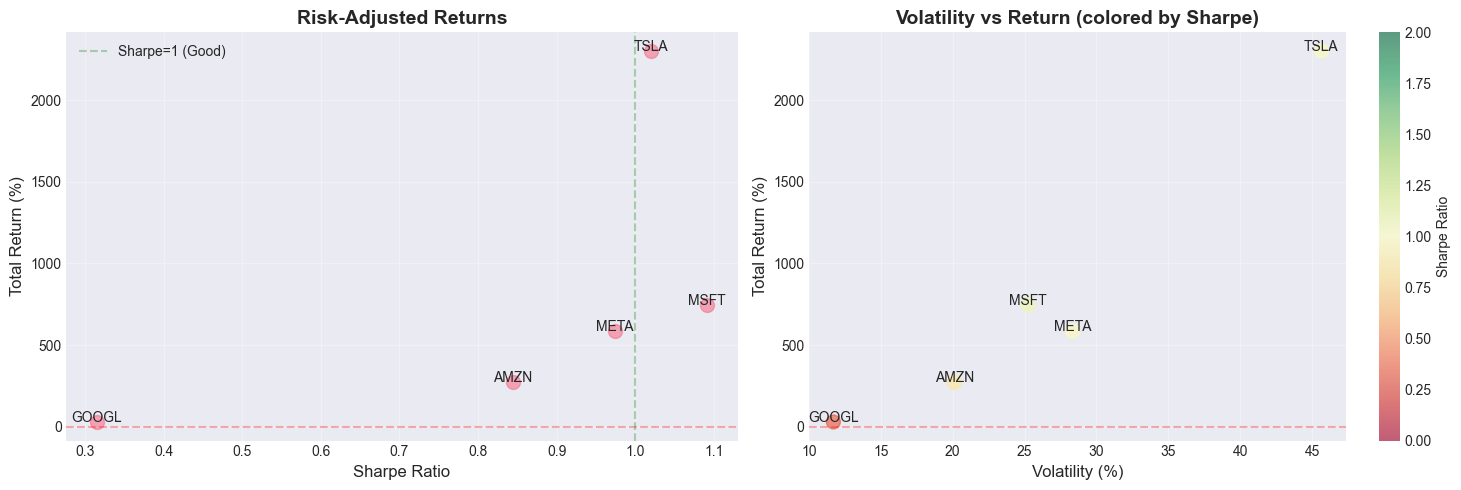

In [26]:
# Risk-Return Analysis
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Sharpe vs Return
axes[0].scatter(df['Sharpe_Ratio'], df['Total_Return_%'], s=100, alpha=0.6)
for i, txt in enumerate(df['Ticker']):
    axes[0].annotate(txt, (df['Sharpe_Ratio'].iloc[i], df['Total_Return_%'].iloc[i]), 
                     fontsize=10, ha='center')
axes[0].axhline(y=0, color='r', linestyle='--', alpha=0.3)
axes[0].axvline(x=1, color='g', linestyle='--', alpha=0.3, label='Sharpe=1 (Good)')
axes[0].set_xlabel('Sharpe Ratio', fontsize=12)
axes[0].set_ylabel('Total Return (%)', fontsize=12)
axes[0].set_title('Risk-Adjusted Returns', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Volatility vs Return
axes[1].scatter(df['Volatility_%'], df['Total_Return_%'], s=100, alpha=0.6, c=df['Sharpe_Ratio'], 
                cmap='RdYlGn', vmin=0, vmax=2)
for i, txt in enumerate(df['Ticker']):
    axes[1].annotate(txt, (df['Volatility_%'].iloc[i], df['Total_Return_%'].iloc[i]), 
                     fontsize=10, ha='center')
axes[1].axhline(y=0, color='r', linestyle='--', alpha=0.3)
axes[1].set_xlabel('Volatility (%)', fontsize=12)
axes[1].set_ylabel('Total Return (%)', fontsize=12)
axes[1].set_title('Volatility vs Return (colored by Sharpe)', fontsize=14, fontweight='bold')
plt.colorbar(axes[1].collections[0], ax=axes[1], label='Sharpe Ratio')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

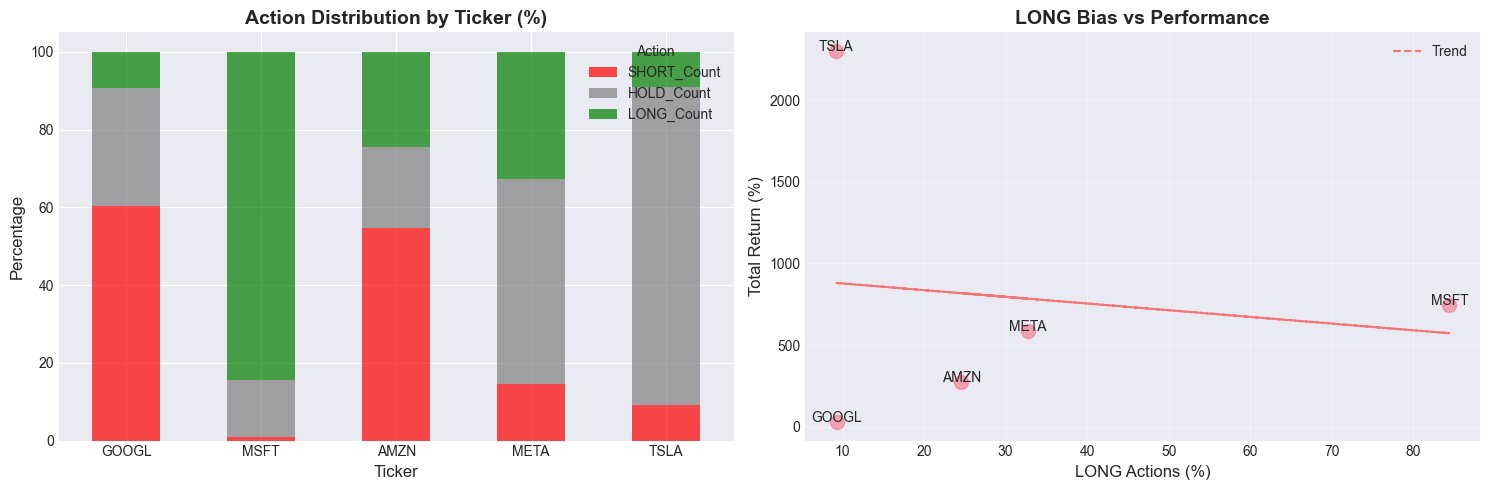


Correlation LONG% vs Return: -0.143

INTERPRETATION:
Action Types:
  • RED (SHORT) = Betting price will go down
  • GRAY (HOLD) = Staying out of market
  • GREEN (LONG) = Betting price will go up

Key Insight:
  → Weak correlation (-0.14)
  → Action mix doesn't strongly predict returns


In [27]:
# Action distribution analysis
action_cols = ['SHORT_Count', 'HOLD_Count', 'LONG_Count']
action_data = df[['Ticker'] + action_cols].set_index('Ticker')

# Calculate percentages
action_pct = action_data.div(action_data.sum(axis=1), axis=0) * 100

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Stacked bar chart
action_pct.plot(kind='bar', stacked=True, ax=axes[0], 
                color=['red', 'gray', 'green'], alpha=0.7)
axes[0].set_title('Action Distribution by Ticker (%)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Percentage', fontsize=12)
axes[0].set_xlabel('Ticker', fontsize=12)
axes[0].legend(title='Action', loc='upper right')
axes[0].tick_params(axis='x', rotation=0)

# Correlation: LONG% vs Return
action_pct['Total_Return_%'] = df['Total_Return_%'].values
axes[1].scatter(action_pct['LONG_Count'], action_pct['Total_Return_%'], s=100, alpha=0.6)
for idx, ticker in enumerate(action_pct.index):
    axes[1].annotate(ticker, (action_pct['LONG_Count'].iloc[idx], action_pct['Total_Return_%'].iloc[idx]),
                     fontsize=10, ha='center')
# Add trendline
z = np.polyfit(action_pct['LONG_Count'], action_pct['Total_Return_%'], 1)
p = np.poly1d(z)
axes[1].plot(action_pct['LONG_Count'], p(action_pct['LONG_Count']), "r--", alpha=0.5, label='Trend')
axes[1].set_xlabel('LONG Actions (%)', fontsize=12)
axes[1].set_ylabel('Total Return (%)', fontsize=12)
axes[1].set_title('LONG Bias vs Performance', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate correlation
corr_long_return = action_pct['LONG_Count'].corr(action_pct['Total_Return_%'])
print(f"\nCorrelation LONG% vs Return: {corr_long_return:.3f}")
print("\nINTERPRETATION:")
print("="*70)
print("Action Types:")
print("  • RED (SHORT) = Betting price will go down")
print("  • GRAY (HOLD) = Staying out of market")
print("  • GREEN (LONG) = Betting price will go up")
print(f"\nKey Insight:")
if corr_long_return > 0.5:
    print(f"  → Strong positive correlation ({corr_long_return:.2f})")
    print("  → More LONG positions = better returns")
    print("  → Strategy works best in bull markets (2012-2020 was mostly up)")
elif corr_long_return < -0.5:
    print(f"  → Strong negative correlation ({corr_long_return:.2f})")
    print("  → More SHORT positions = better returns")
else:
    print(f"  → Weak correlation ({corr_long_return:.2f})")
    print("  → Action mix doesn't strongly predict returns")

## 4. Technical Analysis

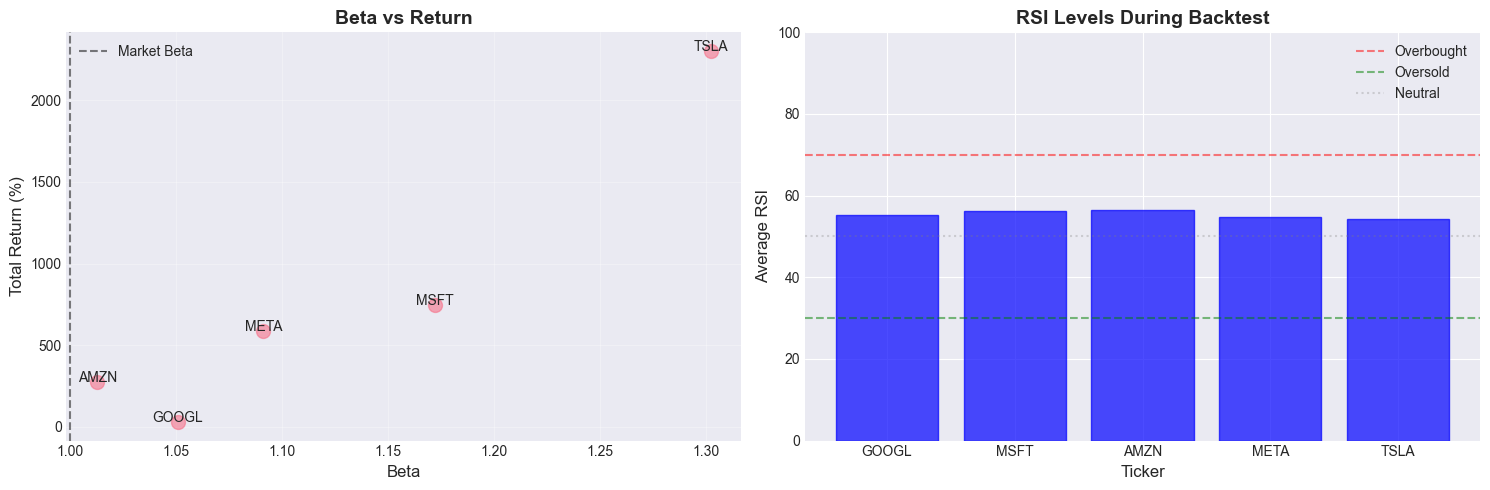


Beta Interpretation:
  GOOGL: 1.05 - Above market volatility
  MSFT: 1.17 - Above market volatility
  AMZN: 1.01 - Above market volatility
  META: 1.09 - Above market volatility
  TSLA: 1.30 - High volatility


In [28]:
# Beta analysis
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Beta vs Return
axes[0].scatter(df['Beta'], df['Total_Return_%'], s=100, alpha=0.6)
for i, txt in enumerate(df['Ticker']):
    axes[0].annotate(txt, (df['Beta'].iloc[i], df['Total_Return_%'].iloc[i]), 
                     fontsize=10, ha='center')
axes[0].axvline(x=1, color='black', linestyle='--', alpha=0.5, label='Market Beta')
axes[0].set_xlabel('Beta', fontsize=12)
axes[0].set_ylabel('Total Return (%)', fontsize=12)
axes[0].set_title('Beta vs Return', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# RSI distribution
bars = axes[1].bar(df['Ticker'], df['RSI_Avg'], alpha=0.7)
axes[1].axhline(y=70, color='red', linestyle='--', alpha=0.5, label='Overbought')
axes[1].axhline(y=30, color='green', linestyle='--', alpha=0.5, label='Oversold')
axes[1].axhline(y=50, color='gray', linestyle=':', alpha=0.3, label='Neutral')
# Color bars based on RSI
for i, (bar, rsi) in enumerate(zip(bars, df['RSI_Avg'])):
    if rsi > 70:
        bar.set_color('red')
    elif rsi < 30:
        bar.set_color('green')
    else:
        bar.set_color('blue')
axes[1].set_ylabel('Average RSI', fontsize=12)
axes[1].set_xlabel('Ticker', fontsize=12)
axes[1].set_title('RSI Levels During Backtest', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].set_ylim(0, 100)

plt.tight_layout()
plt.show()

print("\nBeta Interpretation:")
for _, row in df.iterrows():
    if row['Beta'] > 1.2:
        risk = "High volatility"
    elif row['Beta'] > 1:
        risk = "Above market volatility"
    elif row['Beta'] > 0.8:
        risk = "Similar to market"
    else:
        risk = "Lower volatility"
    print(f"  {row['Ticker']}: {row['Beta']:.2f} - {risk}")

## 5. Fundamental Analysis

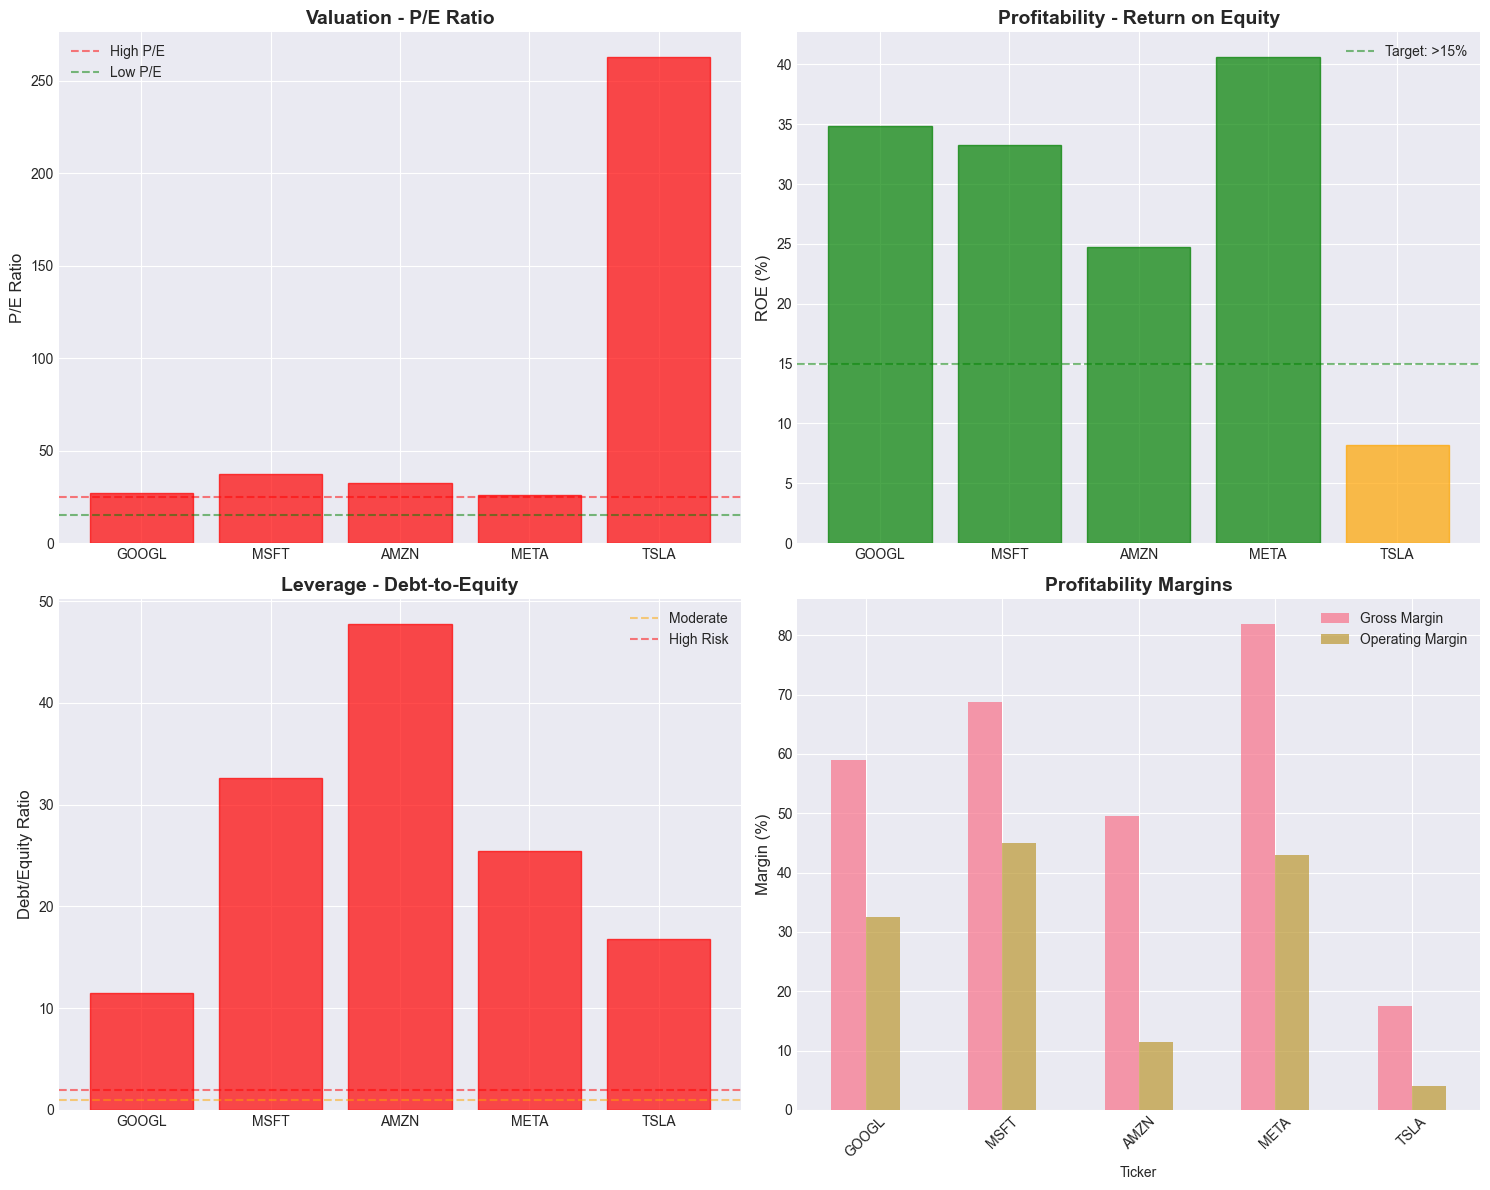

In [29]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# P/E Ratio
bars = axes[0, 0].bar(df['Ticker'], df['PE_Ratio_Avg'], alpha=0.7)
axes[0, 0].axhline(y=25, color='red', linestyle='--', alpha=0.5, label='High P/E')
axes[0, 0].axhline(y=15, color='green', linestyle='--', alpha=0.5, label='Low P/E')
for i, (bar, pe) in enumerate(zip(bars, df['PE_Ratio_Avg'])):
    bar.set_color('red' if pe > 25 else 'green' if pe < 15 else 'orange')
axes[0, 0].set_ylabel('P/E Ratio', fontsize=12)
axes[0, 0].set_title('Valuation - P/E Ratio', fontsize=14, fontweight='bold')
axes[0, 0].legend()

# ROE
bars = axes[0, 1].bar(df['Ticker'], df['ROE_Avg_%'], alpha=0.7)
axes[0, 1].axhline(y=15, color='green', linestyle='--', alpha=0.5, label='Target: >15%')
for i, (bar, roe) in enumerate(zip(bars, df['ROE_Avg_%'])):
    bar.set_color('green' if roe > 15 else 'orange')
axes[0, 1].set_ylabel('ROE (%)', fontsize=12)
axes[0, 1].set_title('Profitability - Return on Equity', fontsize=14, fontweight='bold')
axes[0, 1].legend()

# Debt-to-Equity
bars = axes[1, 0].bar(df['Ticker'], df['Debt_to_Equity_Avg'], alpha=0.7)
axes[1, 0].axhline(y=1, color='orange', linestyle='--', alpha=0.5, label='Moderate')
axes[1, 0].axhline(y=2, color='red', linestyle='--', alpha=0.5, label='High Risk')
for i, (bar, de) in enumerate(zip(bars, df['Debt_to_Equity_Avg'])):
    bar.set_color('red' if de > 2 else 'orange' if de > 1 else 'green')
axes[1, 0].set_ylabel('Debt/Equity Ratio', fontsize=12)
axes[1, 0].set_title('Leverage - Debt-to-Equity', fontsize=14, fontweight='bold')
axes[1, 0].legend()

# Margins comparison
margins = df[['Ticker', 'Gross_Margin_Avg_%', 'Operating_Margin_Avg_%']].set_index('Ticker')
margins.plot(kind='bar', ax=axes[1, 1], alpha=0.7)
axes[1, 1].set_ylabel('Margin (%)', fontsize=12)
axes[1, 1].set_title('Profitability Margins', fontsize=14, fontweight='bold')
axes[1, 1].legend(['Gross Margin', 'Operating Margin'])
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [30]:
# Fundamental health score
print("\nFundamental Health Assessment:")
for _, row in df.iterrows():
    score = 0
    reasons = []
    
    # ROE check
    if row['ROE_Avg_%'] > 15:
        score += 2
        reasons.append("Strong ROE")
    elif row['ROE_Avg_%'] > 10:
        score += 1
    
    # Debt check
    if row['Debt_to_Equity_Avg'] < 1:
        score += 2
        reasons.append("Low debt")
    elif row['Debt_to_Equity_Avg'] < 2:
        score += 1
    else:
        reasons.append("High debt risk")
    
    # Margins check
    if row['Gross_Margin_Avg_%'] > 50:
        score += 2
        reasons.append("Excellent margins")
    elif row['Gross_Margin_Avg_%'] > 30:
        score += 1
    
    # Current ratio check
    if row['Current_Ratio_Avg'] > 2:
        score += 1
        reasons.append("Strong liquidity")
    elif row['Current_Ratio_Avg'] < 1:
        reasons.append("Liquidity concerns")
    
    rating = "Excellent" if score >= 6 else "Good" if score >= 4 else "Fair" if score >= 2 else "Weak"
    print(f"  {row['Ticker']}: {rating} (Score: {score}/7) - {', '.join(reasons)}")


Fundamental Health Assessment:
  GOOGL: Good (Score: 4/7) - Strong ROE, High debt risk, Excellent margins
  MSFT: Good (Score: 4/7) - Strong ROE, High debt risk, Excellent margins
  AMZN: Fair (Score: 3/7) - Strong ROE, High debt risk
  META: Good (Score: 4/7) - Strong ROE, High debt risk, Excellent margins
  TSLA: Weak (Score: 1/7) - High debt risk, Strong liquidity


## 6. Portfolio vs Stock Performance

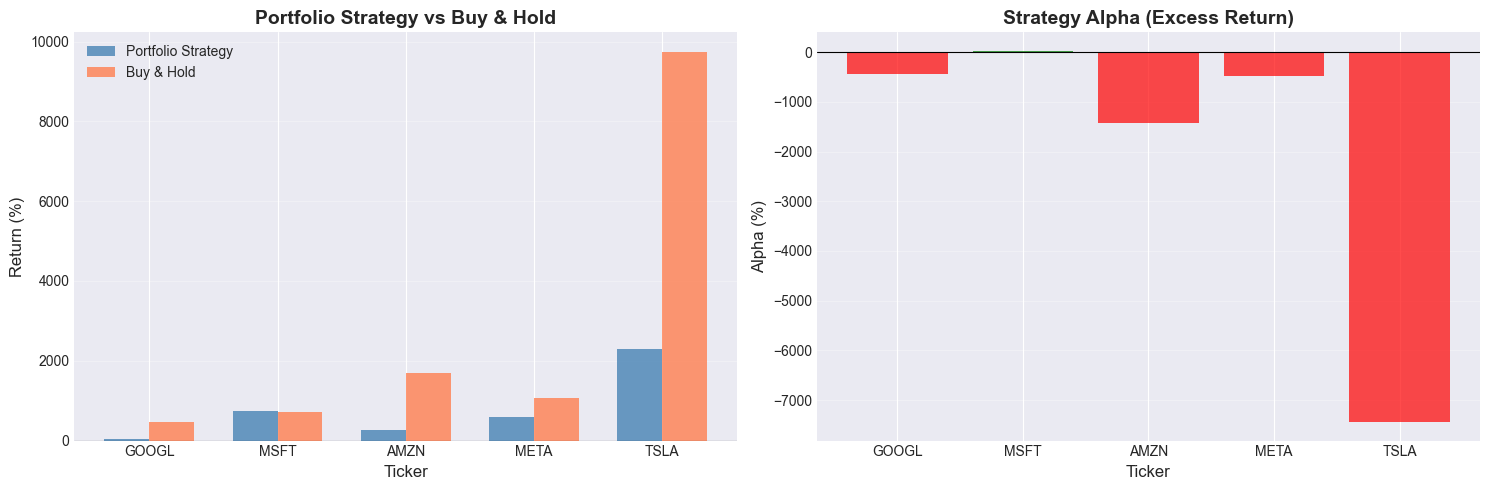


Strategy Performance vs Buy & Hold:
Ticker  Total_Return_%  Stock_Price_Change_%        Alpha  Outperformed
 GOOGL       30.128185            463.162953  -433.034768         False
  MSFT      748.509286            723.394238    25.115048          True
  AMZN      272.439590           1702.836577 -1430.396987         False
  META      585.932510           1074.384605  -488.452095         False
  TSLA     2301.264834           9743.863532 -7442.598698         False

Outperformed Buy & Hold: 1/5 tickers

INTERPRETATION:
What is Alpha?
  → Alpha = Strategy Return - Buy & Hold Return
  → Positive Alpha (GREEN) = Strategy beat buy-and-hold
  → Negative Alpha (RED) = Better to just buy and hold

Key Insight:
  ✓ Strategy outperformed on 1 ticker(s): MSFT
  ✗ Buy & Hold better on 4 ticker(s): GOOGL, AMZN, META, TSLA

Average Alpha: -1953.9%
  → Buy & Hold was better on average


In [31]:
# Compare portfolio returns vs buy-and-hold
comparison = df[['Ticker', 'Total_Return_%', 'Stock_Price_Change_%']].copy()
comparison['Alpha'] = comparison['Total_Return_%'] - comparison['Stock_Price_Change_%']
comparison['Outperformed'] = comparison['Alpha'] > 0

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Side-by-side comparison
x = np.arange(len(comparison))
width = 0.35
bars1 = axes[0].bar(x - width/2, comparison['Total_Return_%'], width, 
                     label='Portfolio Strategy', alpha=0.8, color='steelblue')
bars2 = axes[0].bar(x + width/2, comparison['Stock_Price_Change_%'], width,
                     label='Buy & Hold', alpha=0.8, color='coral')
axes[0].set_ylabel('Return (%)', fontsize=12)
axes[0].set_xlabel('Ticker', fontsize=12)
axes[0].set_title('Portfolio Strategy vs Buy & Hold', fontsize=14, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(comparison['Ticker'])
axes[0].legend()
axes[0].axhline(y=0, color='black', linestyle='-', linewidth=0.8)
axes[0].grid(True, alpha=0.3, axis='y')

# Alpha (excess return)
colors = ['green' if x > 0 else 'red' for x in comparison['Alpha']]
bars = axes[1].bar(comparison['Ticker'], comparison['Alpha'], alpha=0.7, color=colors)
axes[1].axhline(y=0, color='black', linestyle='-', linewidth=0.8)
axes[1].set_ylabel('Alpha (%)', fontsize=12)
axes[1].set_xlabel('Ticker', fontsize=12)
axes[1].set_title('Strategy Alpha (Excess Return)', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\nStrategy Performance vs Buy & Hold:")
print(comparison.to_string(index=False))
print(f"\nOutperformed Buy & Hold: {comparison['Outperformed'].sum()}/{len(comparison)} tickers")

print("\n" + "="*70)
print("INTERPRETATION:")
print("="*70)
print("What is Alpha?")
print("  → Alpha = Strategy Return - Buy & Hold Return")
print("  → Positive Alpha (GREEN) = Strategy beat buy-and-hold")
print("  → Negative Alpha (RED) = Better to just buy and hold")
print("\nKey Insight:")
winners = comparison[comparison['Alpha'] > 0]
losers = comparison[comparison['Alpha'] < 0]
if len(winners) > 0:
    print(f"  ✓ Strategy outperformed on {len(winners)} ticker(s): {', '.join(winners['Ticker'])}")
if len(losers) > 0:
    print(f"  ✗ Buy & Hold better on {len(losers)} ticker(s): {', '.join(losers['Ticker'])}")
print(f"\nAverage Alpha: {comparison['Alpha'].mean():.1f}%")
if comparison['Alpha'].mean() > 0:
    print("  → Strategy adds value on average!")
else:
    print("  → Buy & Hold was better on average")

## 7. Correlation Analysis

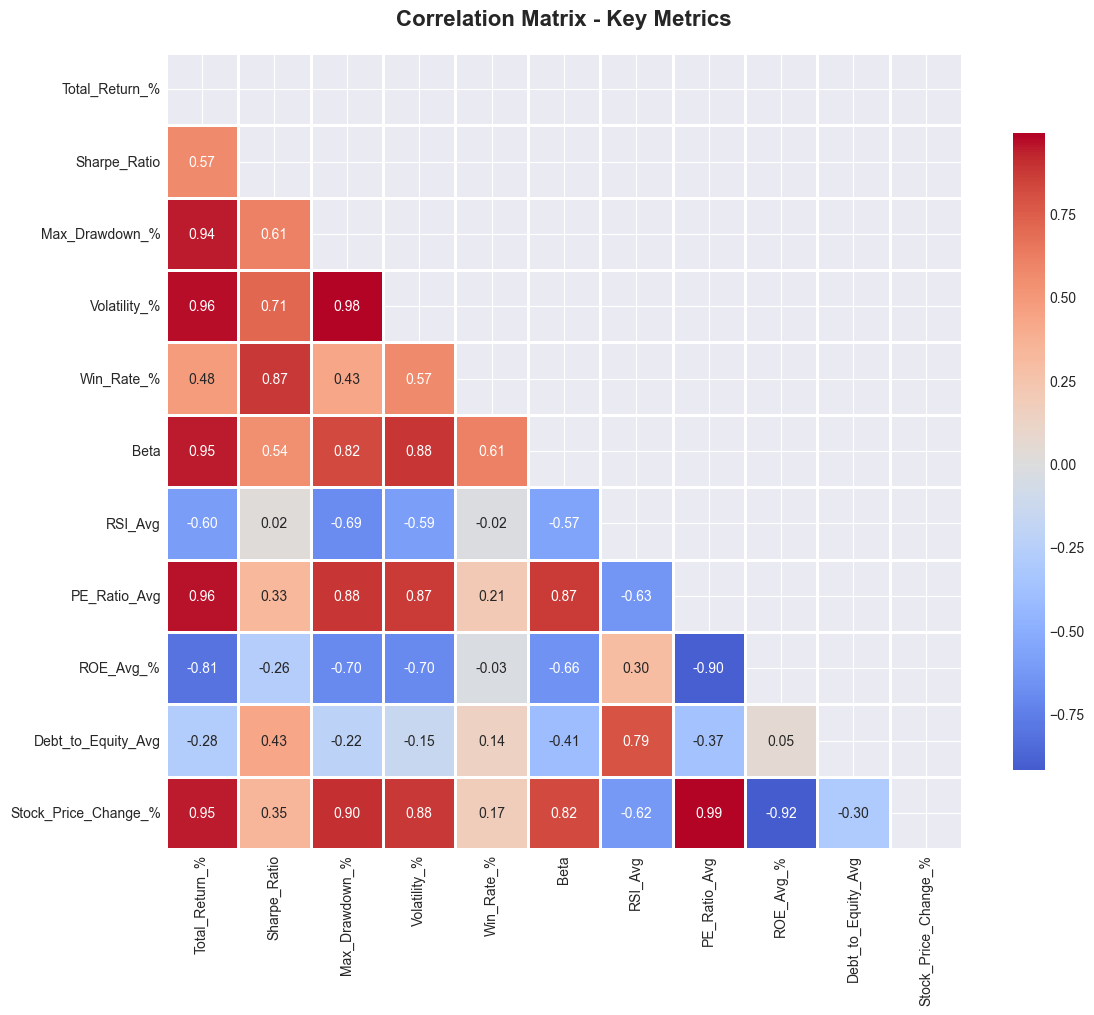

In [32]:
# Select key metrics for correlation
corr_cols = ['Total_Return_%', 'Sharpe_Ratio', 'Max_Drawdown_%', 'Volatility_%', 
             'Win_Rate_%', 'Beta', 'RSI_Avg', 'PE_Ratio_Avg', 'ROE_Avg_%', 
             'Debt_to_Equity_Avg', 'Stock_Price_Change_%']

# Calculate correlation matrix
corr_matrix = df[corr_cols].corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Key Metrics', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

In [33]:
# Key correlations with Total Return
return_corrs = corr_matrix['Total_Return_%'].drop('Total_Return_%').sort_values(ascending=False)

print("\nCorrelations with Total Return:")
print("="*50)
for metric, corr in return_corrs.items():
    strength = "Strong" if abs(corr) > 0.7 else "Moderate" if abs(corr) > 0.4 else "Weak"
    direction = "positive" if corr > 0 else "negative"
    print(f"{metric:30s}: {corr:6.3f} ({strength} {direction})")


Correlations with Total Return:
Volatility_%                  :  0.965 (Strong positive)
PE_Ratio_Avg                  :  0.956 (Strong positive)
Beta                          :  0.946 (Strong positive)
Stock_Price_Change_%          :  0.945 (Strong positive)
Max_Drawdown_%                :  0.943 (Strong positive)
Sharpe_Ratio                  :  0.568 (Moderate positive)
Win_Rate_%                    :  0.479 (Moderate positive)
Debt_to_Equity_Avg            : -0.281 (Weak negative)
RSI_Avg                       : -0.603 (Moderate negative)
ROE_Avg_%                     : -0.807 (Strong negative)


## 8. Risk Analysis

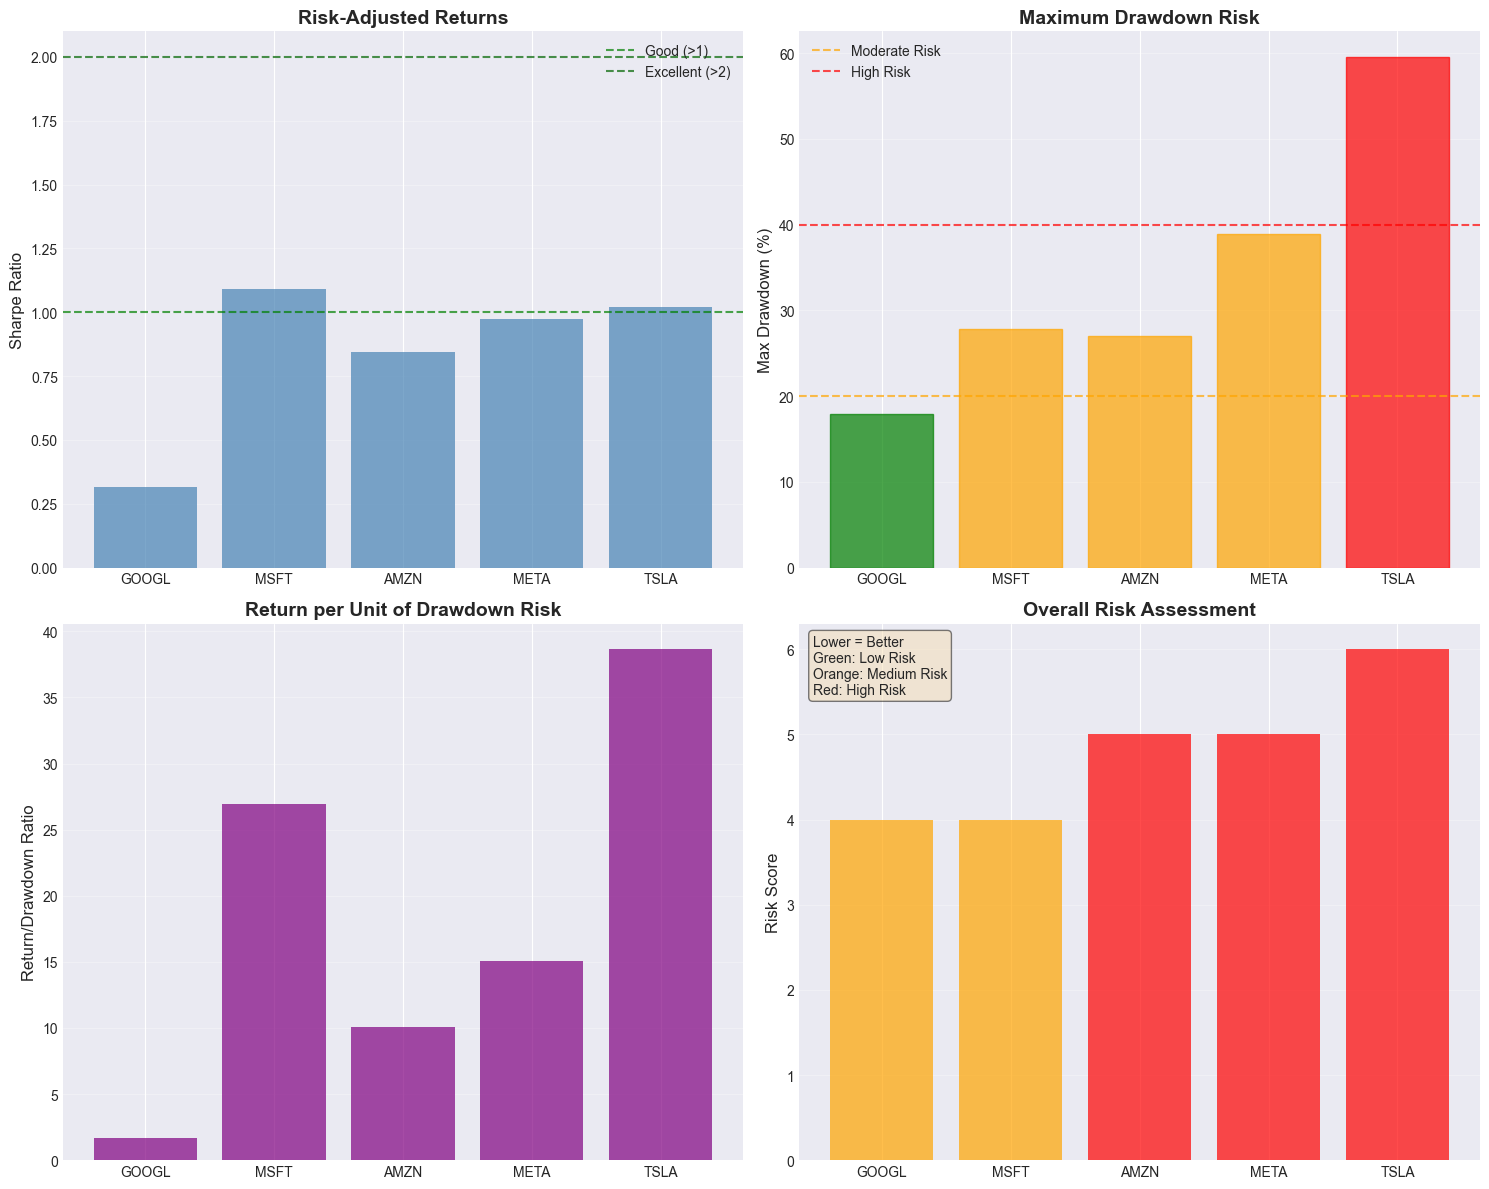


Risk Classification:
  GOOGL: Medium Risk (Score: 4)
  MSFT: Medium Risk (Score: 4)
  AMZN: High Risk (Score: 5)
  META: High Risk (Score: 5)
  TSLA: High Risk (Score: 6)


In [34]:
# Risk-adjusted metrics
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Sharpe Ratio distribution
axes[0, 0].bar(df['Ticker'], df['Sharpe_Ratio'], alpha=0.7, color='steelblue')
axes[0, 0].axhline(y=1, color='green', linestyle='--', alpha=0.7, label='Good (>1)')
axes[0, 0].axhline(y=2, color='darkgreen', linestyle='--', alpha=0.7, label='Excellent (>2)')
axes[0, 0].set_ylabel('Sharpe Ratio', fontsize=12)
axes[0, 0].set_title('Risk-Adjusted Returns', fontsize=14, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3, axis='y')

# Max Drawdown
bars = axes[0, 1].bar(df['Ticker'], df['Max_Drawdown_%'], alpha=0.7)
axes[0, 1].axhline(y=20, color='orange', linestyle='--', alpha=0.7, label='Moderate Risk')
axes[0, 1].axhline(y=40, color='red', linestyle='--', alpha=0.7, label='High Risk')
for i, (bar, dd) in enumerate(zip(bars, df['Max_Drawdown_%'])):
    bar.set_color('green' if dd < 20 else 'orange' if dd < 40 else 'red')
axes[0, 1].set_ylabel('Max Drawdown (%)', fontsize=12)
axes[0, 1].set_title('Maximum Drawdown Risk', fontsize=14, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Return/Risk ratio (Calmar-like)
df['Return_DD_Ratio'] = df['Total_Return_%'] / df['Max_Drawdown_%']
bars = axes[1, 0].bar(df['Ticker'], df['Return_DD_Ratio'], alpha=0.7, color='purple')
axes[1, 0].set_ylabel('Return/Drawdown Ratio', fontsize=12)
axes[1, 0].set_title('Return per Unit of Drawdown Risk', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Risk categorization
risk_scores = []
for _, row in df.iterrows():
    score = 0
    if row['Sharpe_Ratio'] < 0.5:
        score += 3
    elif row['Sharpe_Ratio'] < 1:
        score += 2
    elif row['Sharpe_Ratio'] < 1.5:
        score += 1
    
    if row['Max_Drawdown_%'] > 40:
        score += 3
    elif row['Max_Drawdown_%'] > 25:
        score += 2
    elif row['Max_Drawdown_%'] > 15:
        score += 1
    
    if row['Volatility_%'] > 35:
        score += 2
    elif row['Volatility_%'] > 20:
        score += 1
    
    risk_scores.append(score)

df['Risk_Score'] = risk_scores
risk_colors = ['green' if s <= 2 else 'orange' if s <= 4 else 'red' for s in risk_scores]
axes[1, 1].bar(df['Ticker'], df['Risk_Score'], alpha=0.7, color=risk_colors)
axes[1, 1].set_ylabel('Risk Score', fontsize=12)
axes[1, 1].set_title('Overall Risk Assessment', fontsize=14, fontweight='bold')
axes[1, 1].text(0.02, 0.98, 'Lower = Better\nGreen: Low Risk\nOrange: Medium Risk\nRed: High Risk',
                transform=axes[1, 1].transAxes, fontsize=10, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\nRisk Classification:")
for _, row in df.iterrows():
    if row['Risk_Score'] <= 2:
        risk_level = "Low Risk"
    elif row['Risk_Score'] <= 4:
        risk_level = "Medium Risk"
    else:
        risk_level = "High Risk"
    print(f"  {row['Ticker']}: {risk_level} (Score: {row['Risk_Score']})")

## 9. Market Environment Analysis

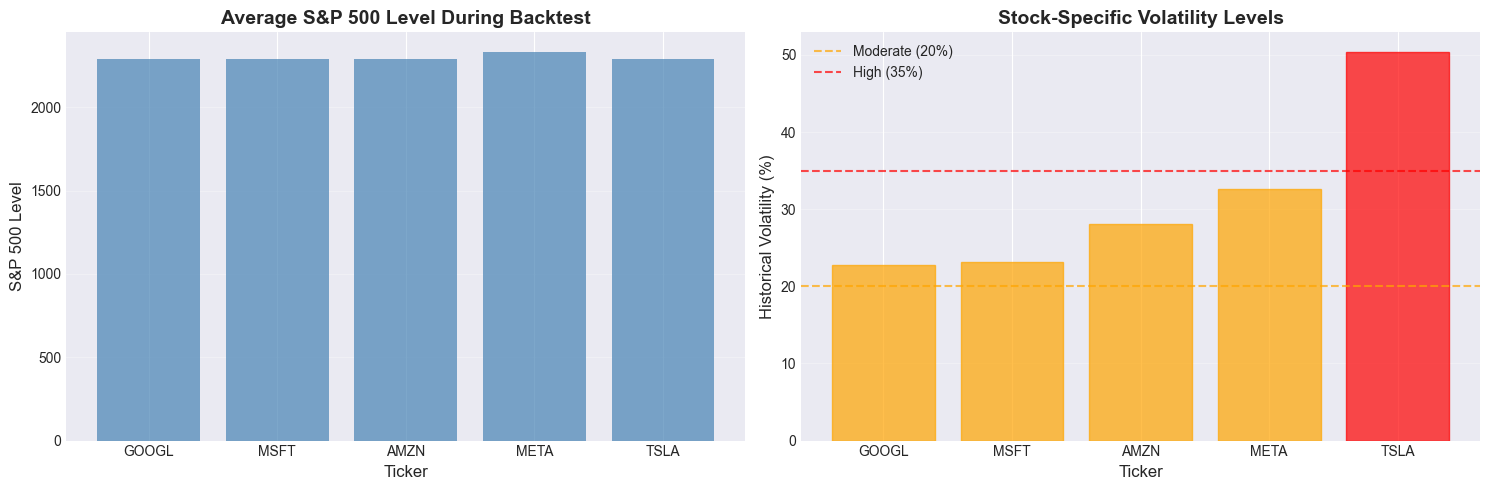


Market Environment Summary:
  Average S&P 500 Level: 2300.10
  S&P Range: 2291.74 - 2333.55
  Average Stock Volatility: 31.41%

Volatility Classification:
  GOOGL: 22.8% (Moderate)
  MSFT: 23.1% (Moderate)
  AMZN: 28.1% (Moderate)
  META: 32.6% (Moderate)
  TSLA: 50.4% (High)


In [35]:
# Market environment during backtest
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# SPX Average during backtest period
bars = axes[0].bar(df['Ticker'], df['SPX_Avg'], alpha=0.7, color='steelblue')
axes[0].set_ylabel('S&P 500 Level', fontsize=12)
axes[0].set_xlabel('Ticker', fontsize=12)
axes[0].set_title('Average S&P 500 Level During Backtest', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')

# Historical Volatility comparison
bars = axes[1].bar(df['Ticker'], df['Historical_Volatility_Avg'] * 100, alpha=0.7, color='orange')
axes[1].axhline(y=20, color='orange', linestyle='--', alpha=0.7, label='Moderate (20%)')
axes[1].axhline(y=35, color='red', linestyle='--', alpha=0.7, label='High (35%)')
for i, (bar, hv) in enumerate(zip(bars, df['Historical_Volatility_Avg'] * 100)):
    if hv < 20:
        bar.set_color('green')
    elif hv < 35:
        bar.set_color('orange')
    else:
        bar.set_color('red')
axes[1].set_ylabel('Historical Volatility (%)', fontsize=12)
axes[1].set_xlabel('Ticker', fontsize=12)
axes[1].set_title('Stock-Specific Volatility Levels', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\nMarket Environment Summary:")
print(f"  Average S&P 500 Level: {df['SPX_Avg'].mean():.2f}")
print(f"  S&P Range: {df['SPX_Avg'].min():.2f} - {df['SPX_Avg'].max():.2f}")
print(f"  Average Stock Volatility: {df['Historical_Volatility_Avg'].mean() * 100:.2f}%")
print("\nVolatility Classification:")
for _, row in df.iterrows():
    hv = row['Historical_Volatility_Avg'] * 100
    if hv < 20:
        vol_level = "Low"
    elif hv < 35:
        vol_level = "Moderate"
    else:
        vol_level = "High"
    print(f"  {row['Ticker']}: {hv:.1f}% ({vol_level})")

## 10. Key Findings & Recommendations

In [36]:
print("="*80)
print("KEY FINDINGS")
print("="*80)

# Best overall performer
best_ticker = df.loc[df['Total_Return_%'].idxmax()]
print(f"\n1. BEST PERFORMER: {best_ticker['Ticker']}")
print(f"   - Total Return: {best_ticker['Total_Return_%']:.2f}%")
print(f"   - Sharpe Ratio: {best_ticker['Sharpe_Ratio']:.2f}")
print(f"   - Max Drawdown: {best_ticker['Max_Drawdown_%']:.2f}%")

# Best risk-adjusted
best_sharpe = df.loc[df['Sharpe_Ratio'].idxmax()]
print(f"\n2. BEST RISK-ADJUSTED: {best_sharpe['Ticker']}")
print(f"   - Sharpe Ratio: {best_sharpe['Sharpe_Ratio']:.2f}")
print(f"   - Total Return: {best_sharpe['Total_Return_%']:.2f}%")
print(f"   - Volatility: {best_sharpe['Volatility_%']:.2f}%")

# Most consistent
best_winrate = df.loc[df['Win_Rate_%'].idxmax()]
print(f"\n3. MOST CONSISTENT: {best_winrate['Ticker']}")
print(f"   - Win Rate: {best_winrate['Win_Rate_%']:.2f}%")
print(f"   - Total Return: {best_winrate['Total_Return_%']:.2f}%")

# Portfolio statistics
print(f"\n4. PORTFOLIO STATISTICS:")
print(f"   - Average Return: {df['Total_Return_%'].mean():.2f}%")
print(f"   - Average Sharpe: {df['Sharpe_Ratio'].mean():.2f}")
print(f"   - Average Max Drawdown: {df['Max_Drawdown_%'].mean():.2f}%")
print(f"   - Average Volatility: {df['Volatility_%'].mean():.2f}%")
print(f"   - Average Win Rate: {df['Win_Rate_%'].mean():.2f}%")

# Strategy effectiveness
outperformers = comparison['Outperformed'].sum()
print(f"\n5. STRATEGY vs BUY & HOLD:")
print(f"   - Outperformed: {outperformers}/{len(df)} tickers ({outperformers/len(df)*100:.1f}%)")
print(f"   - Average Alpha: {comparison['Alpha'].mean():.2f}%")

print("\n" + "="*80)
print("PROS & CONS")
print("="*80)

print("\nPROS:")
if df['Sharpe_Ratio'].mean() > 0.8:
    print("  ✓ Strong risk-adjusted returns across portfolio")
if (df['Total_Return_%'] > 0).all():
    print("  ✓ All tickers profitable")
if outperformers >= len(df) * 0.6:
    print("  ✓ Majority outperformed buy-and-hold")
if df['Win_Rate_%'].mean() > 30:
    print("  ✓ Decent win rate indicating consistent profitability")

print("\nCONS:")
if df['Max_Drawdown_%'].max() > 50:
    print(f"  ✗ High maximum drawdown ({df['Max_Drawdown_%'].max():.1f}%) in worst case")
if df['Volatility_%'].mean() > 25:
    print(f"  ✗ High average volatility ({df['Volatility_%'].mean():.1f}%)")
if df['Win_Rate_%'].mean() < 40:
    print(f"  ✗ Win rate below 40% ({df['Win_Rate_%'].mean():.1f}%)")
if outperformers < len(df) * 0.5:
    print("  ✗ Less than half of tickers beat buy-and-hold")

print("\n" + "="*80)
print("RECOMMENDATIONS")
print("="*80)

# Identify best candidates for live trading
df['Overall_Score'] = (
    df['Sharpe_Ratio'] * 2 +  # Weight Sharpe heavily
    (df['Total_Return_%'] / 100) +
    (df['Win_Rate_%'] / 100) -
    (df['Max_Drawdown_%'] / 100) * 0.5
)

top3 = df.nlargest(3, 'Overall_Score')[['Ticker', 'Total_Return_%', 'Sharpe_Ratio', 'Max_Drawdown_%']]

print("\n1. RECOMMENDED FOR LIVE TRADING (Top 3):")
for idx, row in top3.iterrows():
    print(f"   {row['Ticker']}: Return {row['Total_Return_%']:.1f}%, Sharpe {row['Sharpe_Ratio']:.2f}, DD {row['Max_Drawdown_%']:.1f}%")

print("\n2. RISK MANAGEMENT:")
print("   - Consider position sizing based on volatility")
print(f"   - Set portfolio-wide max drawdown at {df['Max_Drawdown_%'].mean() * 1.2:.1f}%")
print("   - Monitor market conditions and adjust position sizes accordingly")

print("\n3. STRATEGY ADJUSTMENTS:")
long_bias_corr = action_pct['LONG_Count'].corr(action_pct['Total_Return_%'])
if long_bias_corr > 0.5:
    print("   - Strong positive correlation between LONG bias and returns")
    print("   - Consider optimizing for bull market conditions")
elif long_bias_corr < -0.5:
    print("   - Negative correlation suggests SHORT bias effective")
    print("   - Strategy works well in bear markets")

if df['Beta'].mean() > 1.1:
    print(f"   - High average Beta ({df['Beta'].mean():.2f}) = market-sensitive")
    print("   - Add market regime filter for better risk management")

print("\n" + "="*80)

KEY FINDINGS

1. BEST PERFORMER: TSLA
   - Total Return: 2301.26%
   - Sharpe Ratio: 1.02
   - Max Drawdown: 59.56%

2. BEST RISK-ADJUSTED: MSFT
   - Sharpe Ratio: 1.09
   - Total Return: 748.51%
   - Volatility: 25.25%

3. MOST CONSISTENT: MSFT
   - Win Rate: 51.92%
   - Total Return: 748.51%

4. PORTFOLIO STATISTICS:
   - Average Return: 787.65%
   - Average Sharpe: 0.85
   - Average Max Drawdown: 34.24%
   - Average Volatility: 26.21%
   - Average Win Rate: 30.26%

5. STRATEGY vs BUY & HOLD:
   - Outperformed: 1/5 tickers (20.0%)
   - Average Alpha: -1953.87%

PROS & CONS

PROS:
  ✓ Strong risk-adjusted returns across portfolio
  ✓ All tickers profitable
  ✓ Decent win rate indicating consistent profitability

CONS:
  ✗ High maximum drawdown (59.6%) in worst case
  ✗ High average volatility (26.2%)
  ✗ Win rate below 40% (30.3%)
  ✗ Less than half of tickers beat buy-and-hold

RECOMMENDATIONS

1. RECOMMENDED FOR LIVE TRADING (Top 3):
   TSLA: Return 2301.3%, Sharpe 1.02, DD 59.6%
  

## 11. Statistical Tests

Statistical Significance Tests:

1. Returns vs Zero (t-test):
   t-statistic: 1.978
   p-value: 0.1191
   Result: Returns not statistically significant (p >= 0.05)

2. Return Distribution (Shapiro-Wilk):
   Test statistic: 0.832
   p-value: 0.1433
   Result: Returns appear normally distributed (p > 0.05)


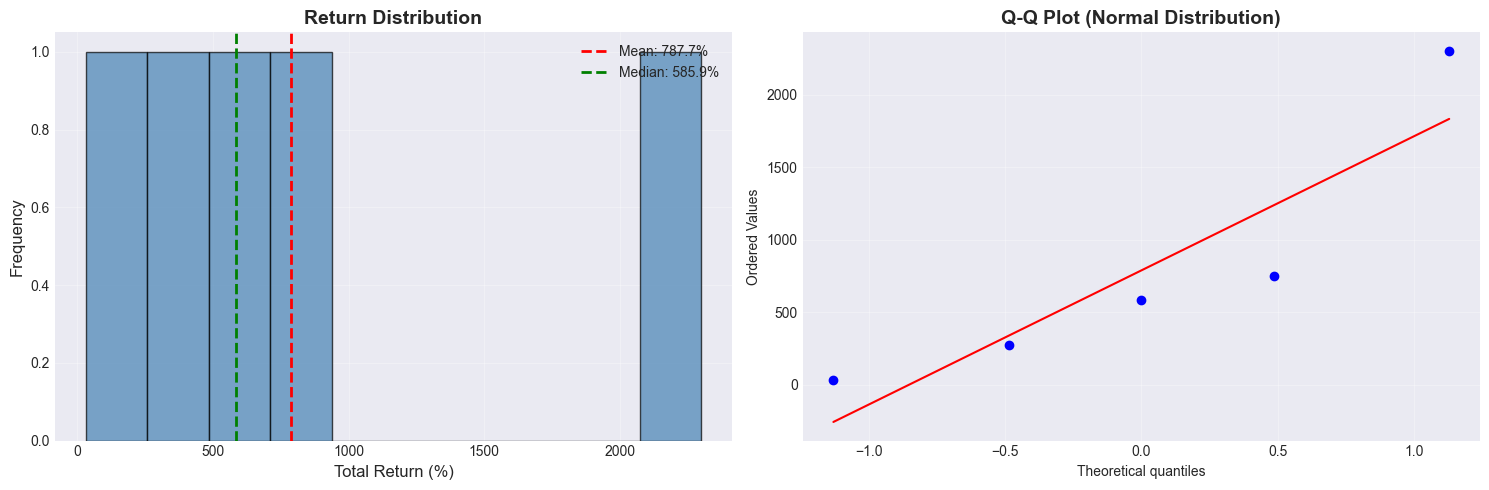

In [37]:
# Test if returns are significantly different from zero
t_stat, p_value = stats.ttest_1samp(df['Total_Return_%'], 0)

print("Statistical Significance Tests:")
print("="*50)
print(f"\n1. Returns vs Zero (t-test):")
print(f"   t-statistic: {t_stat:.3f}")
print(f"   p-value: {p_value:.4f}")
if p_value < 0.05:
    print(f"   Result: Returns are statistically significant (p < 0.05) ✓")
else:
    print(f"   Result: Returns not statistically significant (p >= 0.05)")

# Normality test for returns
stat, p_value_norm = stats.shapiro(df['Total_Return_%'])
print(f"\n2. Return Distribution (Shapiro-Wilk):")
print(f"   Test statistic: {stat:.3f}")
print(f"   p-value: {p_value_norm:.4f}")
if p_value_norm > 0.05:
    print(f"   Result: Returns appear normally distributed (p > 0.05)")
else:
    print(f"   Result: Returns not normally distributed (p <= 0.05)")

# Distribution plot
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram
axes[0].hist(df['Total_Return_%'], bins=10, alpha=0.7, color='steelblue', edgecolor='black')
axes[0].axvline(df['Total_Return_%'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["Total_Return_%"].mean():.1f}%')
axes[0].axvline(df['Total_Return_%'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df["Total_Return_%"].median():.1f}%')
axes[0].set_xlabel('Total Return (%)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Return Distribution', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Q-Q plot
stats.probplot(df['Total_Return_%'], dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot (Normal Distribution)', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()